# Analysis of HackerRank Developer data collected in 2018

The Following analysis is based on the HackerRank data collected in 2018 from developers.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid')
%config Completer.use_jedi = False

%matplotlib inline

## Business Understanding


1. Which plateform people use to learn code ?
1. What Qualities Hiring managers look for in candidate ?
1. What people look for in a company when looking for job opportunities ?

# Understanding and Preparing Data
***

### Loading the all the data as dataframe

In [2]:
# Loading the data to dataframe
df_hr = pd.read_csv('Hacker rank 2018 data /HackerRank-Developer-Survey-2018-Values.csv',low_memory=False)

# Shape of the data
print("Number of rows :",df_hr.shape[0])
print("Number of columns :",df_hr.shape[1])

Number of rows : 25090
Number of columns : 251


In [3]:
pd.set_option('display.max_columns',251)

df_hr.head(3)

,RespondentID,StartDate,EndDate,CountryNumeric2,q1AgeBeginCoding,q2Age,q3Gender,q4Education,q0004_other,q5DegreeFocus,q0005_other,q6LearnCodeUni,q6LearnCodeSelfTaught,q6LearnCodeAccelTrain,q6LearnCodeDontKnowHowToYet,q6LearnCodeOther,q0006_other,q7Level1,q8JobLevel,q0008_other,q8Student,q9CurrentRole,q0009_other,q10Industry,q0010_other,q12JobCritPrefTechStack,q12JobCritCompMission,q12JobCritCompCulture,q12JobCritWorkLifeBal,q12JobCritCompensation,q12JobCritProximity,q12JobCritPerks,q12JobCritSmartPeopleTeam,q12JobCritImpactwithProduct,q12JobCritInterestProblems,q12JobCritFundingandValuation,q12JobCritStability,q12JobCritProfGrowth,q12JobCritOther,q0012_other,q13EmpMeasWhiteboard,q13EmpMeasHackerRank,q13EmpMeasOtherCodingChallenge,q13EmpMeasTechPhoneInt,q13EmpMeasTakeHomeProject,q13EmpMeasResume,q13EmpMeasPastWork,q13EmpMeasOther,q0013_other,q14GoodReflecAbilities,q15Level2,q16HiringManager,q17HirChaInterviews,q17HirChaHardAssessSkills,q17HirChaNotEnoughTalent,q17HirChaNoDiversCandidates,q17HirChaCompfromCompanies,q17HirChaJobDescript,q17HirChaOther,q0017_other,q18NumDevelopHireWithinNextYear,q19TalToolResumeScreen,q19TalToolReferral,q19TalToolHackerRank,q19TalToolOtherProbSolv,q19TalToolPersTest,q19TalToolRemoteorLiveIntTool,q19TalToolOutsourceHumIntPanel,q19TalToolOther,q0019_other,q20CandYearExp,q20CandCompScienceDegree,q20CandCodingBootcamp,q20CandSkillCert,q20CandHackerRankActivity,q20CandOtherCodingCommAct,q20CandGithubPersProj,q20CandOpenSourceContrib,q20CandHackathonPart,q20CandPrevWorkExp,q20CandPrestigeDegree,q20CandLinkInSkills,q20CandGithubPersProj2,q20Other,q0020_other,q21CoreCompProbSolv,q21CoreCompProgLang,q21CoreCompFrameworkProf,q21CoreCompDebugging,q21CoreCompCodebaseNav,q21CoreCompPerfOpt,q21CoreCompCodeReview,q21CoreCompDatabaseDesign,q21CoreCompSysDesign,q21CoreCompTesting,q22LangProfAgnostic,q22LangProfC,q22LangProfCPlusPlus,q22LangProfJava,q22LangProfPython,q22LangProfRuby,q22LangProfJavascript,q22LangProfCSharp,q22LangProfGo,q22LangProfScala,q22LangProfPerl,q22LangProfSwift,q22LangProfPascal,q22LangProfClojure,q22LangProfPHP,q22LangProfHaskell,q22LangProfLua,q22LangProfR,q22LangProfOther,q0022_other,q23FrameAngularJS,q23FrameReact,q23FrameVueDotJS,q23FrameEmber,q23FrameBackboneDotJS,q23FrameSpring,q23FrameJSF,q23FrameStruts,q23FrameNodeDotJS,q23FrameExpressJS,q23FrameMeteor,q23FrameDjango,q23FramePyramid,q23FrameRubyonRails,q23FramePadrino,q23FrameASP,q23FrameNetCore,q23FrameCocoa,q23FrameReactNative,q23FrameRubyMotion,q23FrameOther,q0023_other,q24VimorEmacs,q0024_other,q25LangC,q25LangCPlusPlus,q25LangJava,q25LangPython,q25LangRuby,q25LangJavascript,q25LangCSharp,q25LangGo,q25Scala,q25LangPerl,q25LangSwift,q25LangPascal,q25LangClojure,q25LangPHP,q25LangHaskell,q25LangLua,q25LangR,q25LangRust,q25LangTypescript,q25LangKotlin,q25LangJulia,q25LangErlang,q25LangOcaml,q25LangOther,q26FrameLearnAngularJS,q26FrameLearnReact,q26FrameLearnVueDotjs,q26FrameLearnEmber,q26FrameLearnBackboneDotjs,q26FrameLearnSpring,q26FrameLearnJSF,q26FrameLearnStruts,q26FrameLearnDjango,q26FrameLearnPyramid,q26FrameLearnRubyonRails,q26FrameLearnPadrino,q26FrameLearnASP,q26FrameLearnNetCore,q26FrameLearnNodeDotjs,q26FrameLearnExpressJS,q26FrameLearnMetero,q26FrameLearnCocoa,q26FrameLearnReactNative,q26FrameLearnRubyMotion,q26FrameLearnPadrino2,q26FrameLearnDjango2,q26FrameLearnPyramid2,q0026_other,q27EmergingTechSkill,q0027_other,q28LoveC,q28LoveCPlusPlus,q28LoveJava,q28LovePython,q28LoveRuby,q28LoveJavascript,q28LoveCSharp,q28LoveGo,q28LoveScala,q28LovePerl,q28LoveSwift,q28LovePascal,q28LoveClojure,q28LovePHP,q28LoveHaskell,q28LoveLua,q28LoveR,q28LoveRust,q28LoveKotlin,q28LoveTypescript,q28LoveErlang,q28LoveJulia,q28LoveOCaml,q28LoveOther,q29FrameLoveAngularJS,q29FrameLoveReact,q29FrameLoveVuedotjs,q29FrameLoveEmber,q29FrameLoveBackboneDotjs,q29FrameLoveSpring,q29FrameLoveJSF,q29FrameLoveStruts,q29FrameLoveDjango,q29FrameLovePyramid,q29FrameLoveRubyonRails,q29FrameLovePadrino,q29FrameLoveASP,q29FrameLoveNetCore,q29FrameLoveNodeDotj

***
**Loading Schema**

In [4]:
df_hr_schema = pd.read_csv('Hacker rank 2018 data /HackerRank-Developer-Survey-2018-Codebook.csv')

In [5]:
# Shape of schema df
print("Number of rows :",df_hr_schema.shape[0])
print("Number of columns :",df_hr_schema.shape[1])

Number of rows : 251
Number of columns : 3


In [6]:
df_hr_schema.head()

,Data Field,Survey Question,Notes
0,RespondentID,NaN,Respondent ID
1,StartDate,NaN,When did they start (date and time)
2,EndDate,NaN,When did they end (date and time)
3,CountryNumeric2,NaN,see Country-Code-Mapping.csv
4,q1AgeBeginCoding,At what age did you start coding,NaN


***
### **Data types of all the columns in dataframe**

In [7]:
pd.set_option('display.max_rows',251)
print(df_hr.dtypes)
pd.set_option('display.max_rows',60)

RespondentID                         int64
StartDate                           object
EndDate                             object
CountryNumeric2                     object
q1AgeBeginCoding                    object
q2Age                               object
q3Gender                            object
q4Education                         object
q0004_other                         object
q5DegreeFocus                       object
q0005_other                         object
q6LearnCodeUni                      object
q6LearnCodeSelfTaught               object
q6LearnCodeAccelTrain               object
q6LearnCodeDontKnowHowToYet         object
q6LearnCodeOther                    object
q0006_other                         object
q7Level1                            object
q8JobLevel                          object
q0008_other                         object
q8Student                           object
q9CurrentRole                       object
q0009_other                         object
q10Industry

***
### List of colunms with categorical values

In [8]:
cat_columns = list(df_hr.dtypes[df_hr.dtypes == 'object'].index)
cat_columns

['StartDate',
 'EndDate',
 'CountryNumeric2',
 'q1AgeBeginCoding',
 'q2Age',
 'q3Gender',
 'q4Education',
 'q0004_other',
 'q5DegreeFocus',
 'q0005_other',
 'q6LearnCodeUni',
 'q6LearnCodeSelfTaught',
 'q6LearnCodeAccelTrain',
 'q6LearnCodeDontKnowHowToYet',
 'q6LearnCodeOther',
 'q0006_other',
 'q7Level1',
 'q8JobLevel',
 'q0008_other',
 'q8Student',
 'q9CurrentRole',
 'q0009_other',
 'q10Industry',
 'q0010_other',
 'q12JobCritPrefTechStack',
 'q12JobCritCompMission',
 'q12JobCritCompCulture',
 'q12JobCritWorkLifeBal',
 'q12JobCritCompensation',
 'q12JobCritProximity',
 'q12JobCritPerks',
 'q12JobCritSmartPeopleTeam',
 'q12JobCritImpactwithProduct',
 'q12JobCritInterestProblems',
 'q12JobCritFundingandValuation',
 'q12JobCritStability',
 'q12JobCritProfGrowth',
 'q12JobCritOther',
 'q0012_other',
 'q13EmpMeasWhiteboard',
 'q13EmpMeasHackerRank',
 'q13EmpMeasOtherCodingChallenge',
 'q13EmpMeasTechPhoneInt',
 'q13EmpMeasTakeHomeProject',
 'q13EmpMeasResume',
 'q13EmpMeasPastWork',
 'q13

<hr>

### **As in some column missing values are string and is written as '#NULL!', so we need to change it to NaN**

In [9]:
df_hr.replace('#NULL!',np.nan,inplace=True)

### Columns with all missing values

In [10]:
# List of column which are empty
list(df_hr.columns[df_hr.isnull().sum()/df_hr.shape[0] == 1])

['q20CandGithubPersProj',
 'q26FrameLearnPadrino2',
 'q26FrameLearnDjango2',
 'q26FrameLearnPyramid2']

### Columns with more than 75% of missing values

In [11]:
# List of columns which are more then 75% empty.
list(df_hr.columns[df_hr.isnull().sum()/df_hr.shape[0] > .75])

['q0004_other',
 'q0005_other',
 'q6LearnCodeAccelTrain',
 'q6LearnCodeDontKnowHowToYet',
 'q6LearnCodeOther',
 'q0006_other',
 'q0008_other',
 'q0009_other',
 'q0010_other',
 'q12JobCritPrefTechStack',
 'q12JobCritCompMission',
 'q12JobCritProximity',
 'q12JobCritPerks',
 'q12JobCritImpactwithProduct',
 'q12JobCritFundingandValuation',
 'q12JobCritStability',
 'q12JobCritOther',
 'q0012_other',
 'q13EmpMeasHackerRank',
 'q13EmpMeasTakeHomeProject',
 'q13EmpMeasOther',
 'q0013_other',
 'q17HirChaInterviews',
 'q17HirChaHardAssessSkills',
 'q17HirChaNotEnoughTalent',
 'q17HirChaNoDiversCandidates',
 'q17HirChaCompfromCompanies',
 'q17HirChaJobDescript',
 'q17HirChaOther',
 'q0017_other',
 'q19TalToolReferral',
 'q19TalToolHackerRank',
 'q19TalToolOtherProbSolv',
 'q19TalToolPersTest',
 'q19TalToolRemoteorLiveIntTool',
 'q19TalToolOutsourceHumIntPanel',
 'q19TalToolOther',
 'q0019_other',
 'q20CandYearExp',
 'q20CandCompScienceDegree',
 'q20CandCodingBootcamp',
 'q20CandSkillCert',
 'q20

***

## Function to Describe the column of dataframe

In [12]:
def describe_column(column_name):
    '''
    INPUT:
        column_name : Name of the column to describe
        
    OUTPUT:
        Prints the Description of column and any other details
    '''
    survey_question = list(df_hr_schema[df_hr_schema['Data Field']==column_name]['Survey Question'])[0]
    note = list(df_hr_schema[df_hr_schema['Data Field']==column_name]['Notes'])[0]
    if not pd.isnull(survey_question):
        print(f'Survey Question : \n    {survey_question}')
    if not pd.isnull(note):
        print(f'Note :\n    {note}')

In [13]:
describe_column('q2Age')

Survey Question : 
    How old are you now?


In [14]:
describe_column('q20CandGithubPersProj')

Survey Question : 
    What are the top 3 most important qualifications you look for in an engineering candidate before the onsite? Check up to 3.
Note :
    shown if q16HiringManager == Yes


***
## Function to plot a barchart of particular column of given DataFrame

In [15]:
def plot_count_bar_chart_of_series(ser ,xlabel=None,ylabel=None,title=None,in_percentage=False,no_of_val=25):
    '''
    INPUT :
        ser           : Name of Series.
        xlabel        : The label text for x axis.
        ylabel        : The label text for y axis.
        title         : Title of the figure.
        in_percentage : whether to plot in form of value count or percentage.
        no_of_val     : No of top values in decending order to be taken into consideration.
    OUTPUT :
        Bar Chart accorting to given parameters
    '''
    plt.figure(num=None, figsize=(8, 6), dpi=90)
    if in_percentage==True :
        (ser.value_counts().sort_values(ascending=False).head(no_of_val)*100/ser.count()).plot(kind='bar')
    else :
        ser.value_counts().sort_values(ascending=False).head(no_of_val).plot(kind='bar')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

## Question
# 1. What are the plateform used to learn code?


In [16]:
df_hr.head(3)

,RespondentID,StartDate,EndDate,CountryNumeric2,q1AgeBeginCoding,q2Age,q3Gender,q4Education,q0004_other,q5DegreeFocus,q0005_other,q6LearnCodeUni,q6LearnCodeSelfTaught,q6LearnCodeAccelTrain,q6LearnCodeDontKnowHowToYet,q6LearnCodeOther,q0006_other,q7Level1,q8JobLevel,q0008_other,q8Student,q9CurrentRole,q0009_other,q10Industry,q0010_other,q12JobCritPrefTechStack,q12JobCritCompMission,q12JobCritCompCulture,q12JobCritWorkLifeBal,q12JobCritCompensation,q12JobCritProximity,q12JobCritPerks,q12JobCritSmartPeopleTeam,q12JobCritImpactwithProduct,q12JobCritInterestProblems,q12JobCritFundingandValuation,q12JobCritStability,q12JobCritProfGrowth,q12JobCritOther,q0012_other,q13EmpMeasWhiteboard,q13EmpMeasHackerRank,q13EmpMeasOtherCodingChallenge,q13EmpMeasTechPhoneInt,q13EmpMeasTakeHomeProject,q13EmpMeasResume,q13EmpMeasPastWork,q13EmpMeasOther,q0013_other,q14GoodReflecAbilities,q15Level2,q16HiringManager,q17HirChaInterviews,q17HirChaHardAssessSkills,q17HirChaNotEnoughTalent,q17HirChaNoDiversCandidates,q17HirChaCompfromCompanies,q17HirChaJobDescript,q17HirChaOther,q0017_other,q18NumDevelopHireWithinNextYear,q19TalToolResumeScreen,q19TalToolReferral,q19TalToolHackerRank,q19TalToolOtherProbSolv,q19TalToolPersTest,q19TalToolRemoteorLiveIntTool,q19TalToolOutsourceHumIntPanel,q19TalToolOther,q0019_other,q20CandYearExp,q20CandCompScienceDegree,q20CandCodingBootcamp,q20CandSkillCert,q20CandHackerRankActivity,q20CandOtherCodingCommAct,q20CandGithubPersProj,q20CandOpenSourceContrib,q20CandHackathonPart,q20CandPrevWorkExp,q20CandPrestigeDegree,q20CandLinkInSkills,q20CandGithubPersProj2,q20Other,q0020_other,q21CoreCompProbSolv,q21CoreCompProgLang,q21CoreCompFrameworkProf,q21CoreCompDebugging,q21CoreCompCodebaseNav,q21CoreCompPerfOpt,q21CoreCompCodeReview,q21CoreCompDatabaseDesign,q21CoreCompSysDesign,q21CoreCompTesting,q22LangProfAgnostic,q22LangProfC,q22LangProfCPlusPlus,q22LangProfJava,q22LangProfPython,q22LangProfRuby,q22LangProfJavascript,q22LangProfCSharp,q22LangProfGo,q22LangProfScala,q22LangProfPerl,q22LangProfSwift,q22LangProfPascal,q22LangProfClojure,q22LangProfPHP,q22LangProfHaskell,q22LangProfLua,q22LangProfR,q22LangProfOther,q0022_other,q23FrameAngularJS,q23FrameReact,q23FrameVueDotJS,q23FrameEmber,q23FrameBackboneDotJS,q23FrameSpring,q23FrameJSF,q23FrameStruts,q23FrameNodeDotJS,q23FrameExpressJS,q23FrameMeteor,q23FrameDjango,q23FramePyramid,q23FrameRubyonRails,q23FramePadrino,q23FrameASP,q23FrameNetCore,q23FrameCocoa,q23FrameReactNative,q23FrameRubyMotion,q23FrameOther,q0023_other,q24VimorEmacs,q0024_other,q25LangC,q25LangCPlusPlus,q25LangJava,q25LangPython,q25LangRuby,q25LangJavascript,q25LangCSharp,q25LangGo,q25Scala,q25LangPerl,q25LangSwift,q25LangPascal,q25LangClojure,q25LangPHP,q25LangHaskell,q25LangLua,q25LangR,q25LangRust,q25LangTypescript,q25LangKotlin,q25LangJulia,q25LangErlang,q25LangOcaml,q25LangOther,q26FrameLearnAngularJS,q26FrameLearnReact,q26FrameLearnVueDotjs,q26FrameLearnEmber,q26FrameLearnBackboneDotjs,q26FrameLearnSpring,q26FrameLearnJSF,q26FrameLearnStruts,q26FrameLearnDjango,q26FrameLearnPyramid,q26FrameLearnRubyonRails,q26FrameLearnPadrino,q26FrameLearnASP,q26FrameLearnNetCore,q26FrameLearnNodeDotjs,q26FrameLearnExpressJS,q26FrameLearnMetero,q26FrameLearnCocoa,q26FrameLearnReactNative,q26FrameLearnRubyMotion,q26FrameLearnPadrino2,q26FrameLearnDjango2,q26FrameLearnPyramid2,q0026_other,q27EmergingTechSkill,q0027_other,q28LoveC,q28LoveCPlusPlus,q28LoveJava,q28LovePython,q28LoveRuby,q28LoveJavascript,q28LoveCSharp,q28LoveGo,q28LoveScala,q28LovePerl,q28LoveSwift,q28LovePascal,q28LoveClojure,q28LovePHP,q28LoveHaskell,q28LoveLua,q28LoveR,q28LoveRust,q28LoveKotlin,q28LoveTypescript,q28LoveErlang,q28LoveJulia,q28LoveOCaml,q28LoveOther,q29FrameLoveAngularJS,q29FrameLoveReact,q29FrameLoveVuedotjs,q29FrameLoveEmber,q29FrameLoveBackboneDotjs,q29FrameLoveSpring,q29FrameLoveJSF,q29FrameLoveStruts,q29FrameLoveDjango,q29FrameLovePyramid,q29FrameLoveRubyonRails,q29FrameLovePadrino,q29FrameLoveASP,q29FrameLoveNetCore,q29FrameLoveNodeDotj

In [17]:
describe_column('q30LearnCodeStackOverflow')

Survey Question : 
    Besides HackerRank, which other resources do you use to practice and learn coding? Check all that apply.


## Percentage of people using different plateform

***
**List of All the Popular plateform**

In [18]:
# List of the different Learning Plateform which are being used to Learn code
learn_code_plateform_names = ['q30LearnCodeStackOverflow','q30LearnCodeYoutube','q30LearnCodeMOOC',
                              'q30LearnCodeCompCodingSites','q30LearnCodeOnlineTutorial','q30LearnCodeBooks',
                              'q30LearnCodeAcademicPaper','q0030_other']

In [19]:
# Creating DataFrame containing learning plateform as column
df_code_learning_plateform = df_hr[learn_code_plateform_names].copy()

# As Names of Columns are bit confusing, So I have created a dictionary 
# to rename them
rename_columns_map = {'q30LearnCodeStackOverflow':'StackOverflow',
              'q30LearnCodeYoutube':'Youtube',
              'q30LearnCodeMOOC':'MOOC',# (i.e. Udemy, Udacity, Coursera, Edx, etc.)
              'q30LearnCodeCompCodingSites':'CompCodingSites',
              'q30LearnCodeOnlineTutorial':'OnlineTutorial',
              'q30LearnCodeBooks': 'Books',
              'q30LearnCodeAcademicPaper':'AcademicPaper',
              'q0030_other':'Other'}


# These are the name of the column after renaming
new_columns_names = ['StackOverflow','Youtube','MOOC','CompCodingSites',
                   'OnlineTutorial','Books','AcademicPaper','Other']

df_code_learning_plateform.rename(columns=rename_columns_map,inplace=True)

***
### Total No of rows

In [20]:
df_code_learning_plateform.shape[0]

25090

### No of rows with all missing values

In [21]:
print('No of rows with all missing values : ',df_code_learning_plateform.isnull().all(axis=1).sum())

No of rows with all missing values :  366


In [22]:
# Converting categorical values to 1
# As it is difficult to Handle caltgorical value 
# so here we have converted it to 1.0
# as there is only one value in each columns

str_to_bool = lambda y : 1 if isinstance(y,str) else np.nan
df_code_learning_plateform = df_code_learning_plateform.apply(lambda x : x.apply(str_to_bool))

df_code_learning_plateform.head(5)

,StackOverflow,Youtube,MOOC,CompCodingSites,OnlineTutorial,Books,AcademicPaper,Other
0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0
1,1.0,1.0,1.0,NaN,NaN,1.0,NaN,NaN
2,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN
3,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,NaN,NaN,NaN,NaN,1.0,NaN,1.0


In [23]:
# Creating a column which represent null in all other column
df_code_learning_plateform['Not Answered'] = df_code_learning_plateform[new_columns_names].isnull().all(axis=1)

# Replacing all True values of Not Answered Column by 1 and False by 0
df_code_learning_plateform['Not Answered'] = df_code_learning_plateform['Not Answered'].apply(lambda x : 1 if x == True else 0)

# Replaceing all NaN values by Zero (0) 
df_code_learning_plateform = df_code_learning_plateform.replace(np.nan,0)

In [24]:
# Percentage of people using defferent plateform
(df_code_learning_plateform.sum()*100/df_code_learning_plateform.shape[0]).reset_index().rename(columns={'index':'Age Group',
                                                                                                         0:'Percentage'})

,Age Group,Percentage
0,StackOverflow,83.702670
1,Youtube,67.600638
2,MOOC,48.959745
3,CompCodingSites,40.027900
4,OnlineTutorial,45.125548
5,Books,60.191311
6,AcademicPaper,22.164209
7,Other,4.874452
8,Not Answered,1.458749


## Percentage of people using different plateform

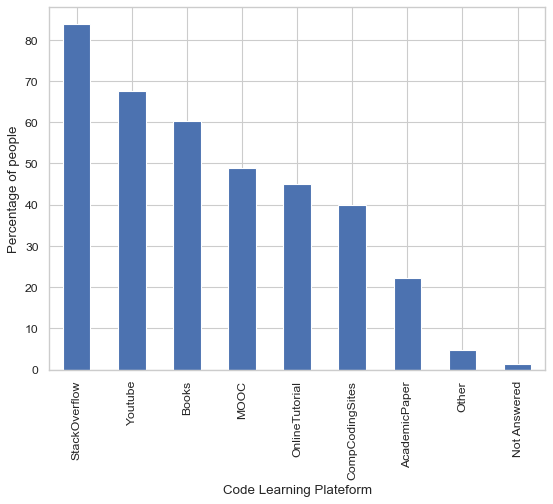

In [25]:
plt.figure(num=None, figsize=(8, 6), dpi=80)
(df_code_learning_plateform.sum()*100/df_code_learning_plateform.shape[0]).sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Code Learning Plateform')
plt.ylabel("Percentage of people")
plt.show()


***
## 1.1 Which plateform people within different age group use to learn code ?

In [26]:
df_hr['q2Age'].value_counts().reset_index().rename(columns={'index':'Age Group','q2Age':'Count'})

,Age Group,Count
0,18 - 24 years old,12589
1,25 - 34 years old,8514
2,35 - 44 years old,2333
3,12 - 18 years old,1011
4,45 - 54 years old,468
5,55 - 64 years old,102
6,Under 12 years old,13
7,65 - 74 years old,11
8,75 years or older,8


In [27]:
describe_column('q2Age') # Describing the q2Age Column

Survey Question : 
    How old are you now?


In [28]:
# Percentage of people with in different agegroup
((df_hr['q2Age'].value_counts()/df_hr.shape[0])*100).reset_index().rename(columns={'index':'Age Group',
                                                                                  'q2Age':'Percentage'})

,Age Group,Percentage
0,18 - 24 years old,50.175369
1,25 - 34 years old,33.933838
2,35 - 44 years old,9.298525
3,12 - 18 years old,4.029494
4,45 - 54 years old,1.865285
5,55 - 64 years old,0.406536
6,Under 12 years old,0.051813
7,65 - 74 years old,0.043842
8,75 years or older,0.031885


### Percentage of people with in different agegroup

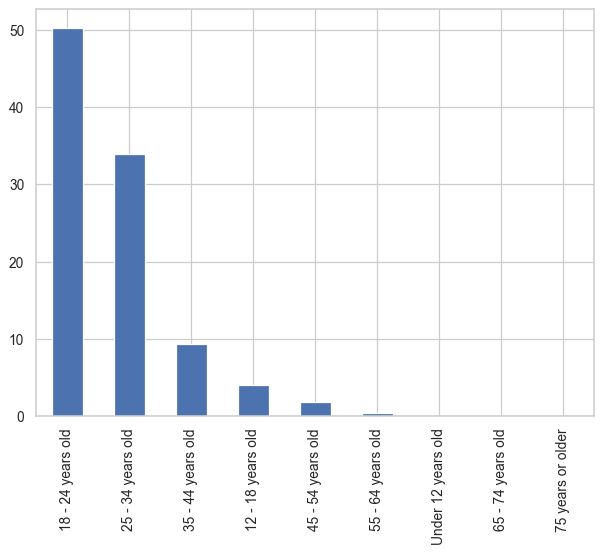

In [29]:
plot_count_bar_chart_of_series(df_hr['q2Age'],in_percentage=True)

***
## Heat Chart of Different Age group vs Plateform use to learn code

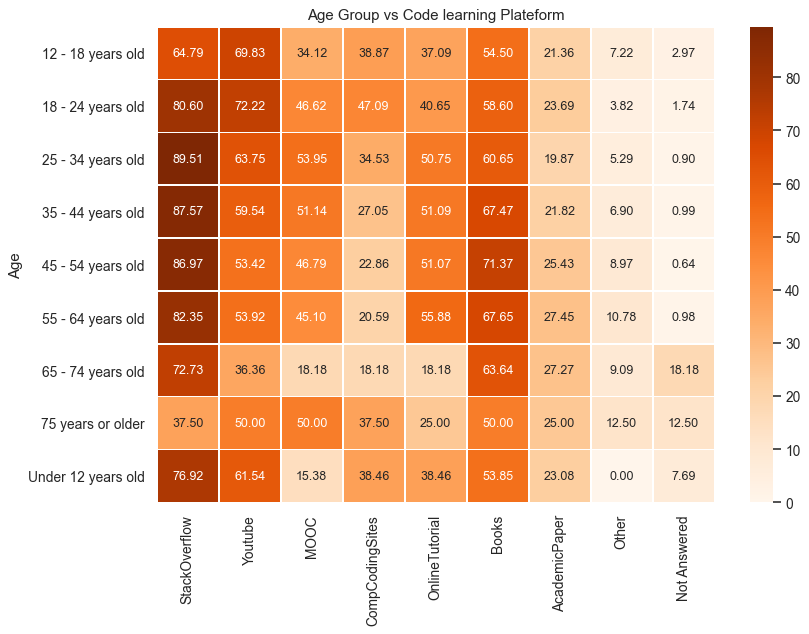

In [30]:
plt.figure(num=None, figsize=(10, 7), dpi=90)

concat_age_and_learning_plateform = pd.concat([df_hr['q2Age'],df_code_learning_plateform],axis=1)

group_by_column_age = concat_age_and_learning_plateform.groupby('q2Age').mean()*100

sns.heatmap(group_by_column_age,
            fmt='.2f',
            annot=True,
            cmap='Oranges',
            linewidth=.5)


plt.title('Age Group vs Code learning Plateform')
plt.ylabel('Age')
plt.show()

***
## 1.2 Which Plateform is being used by people within different country to learn code ?

In [31]:
df_hr['CountryNumeric2'].value_counts().sort_values(ascending=False).reset_index().rename(columns={'index':'Country',
                                                                                                   'CountryNumeric2':'Count'})

,Country,Count
0,India,8088
1,United States,4937
2,Canada,642
3,Brazil,502
4,United Kingdom,443
...,...,...
147,Somalia,1
148,Libya,1
149,Angola,1
150,CN,1


***
### Total Numbers of Countries

In [32]:
print('Total No of countries are :',len(df_hr['CountryNumeric2'].unique()))

Total No of countries are : 153


## Percentage of people within top 10 countries in terms of numbers of survey submission

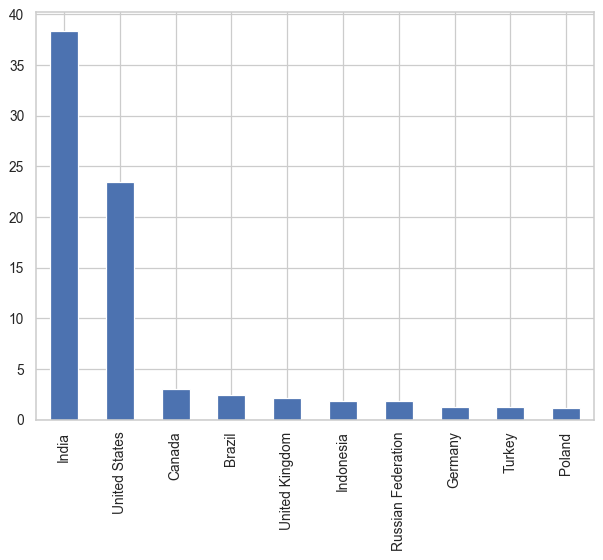

In [33]:
plot_count_bar_chart_of_series(df_hr['CountryNumeric2'],no_of_val=10,in_percentage=True)

***
## Heat Chart of top 10 Countries in terms of survey submission

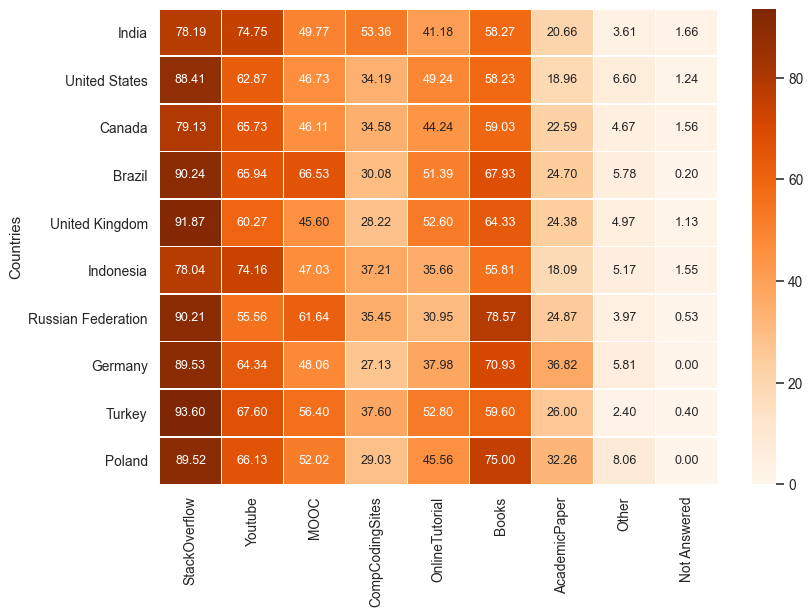

In [34]:
top_10_country = df_hr['CountryNumeric2'].value_counts().sort_values(ascending=False).head(10)

df_country_plateform = pd.concat([df_hr['CountryNumeric2'],df_code_learning_plateform],axis=1)
df_plateform_groupby_country = df_country_plateform.groupby('CountryNumeric2').mean()
df_plateform_groupby_country.loc[top_10_country.index]


plt.figure(num=None, figsize=(10, 7), dpi=90)
sns.heatmap(df_plateform_groupby_country.loc[top_10_country.index]*100,
            fmt='.2f',
            annot=True,
            cmap='Oranges',
            linewidth=.5)

plt.ylabel('Countries')
plt.show()

## 1.3 Which Learning Plateform is being used more based on gender ?

In [35]:
df_hr['q3Gender'].value_counts().sort_values(ascending=False).reset_index().rename(columns={'index':'Gender',
                                                                                            'q3Gender':'Count'})

,Gender,Count
0,Male,20774
1,Female,4122
2,Non-Binary,125


## Percentage of people based on their gender

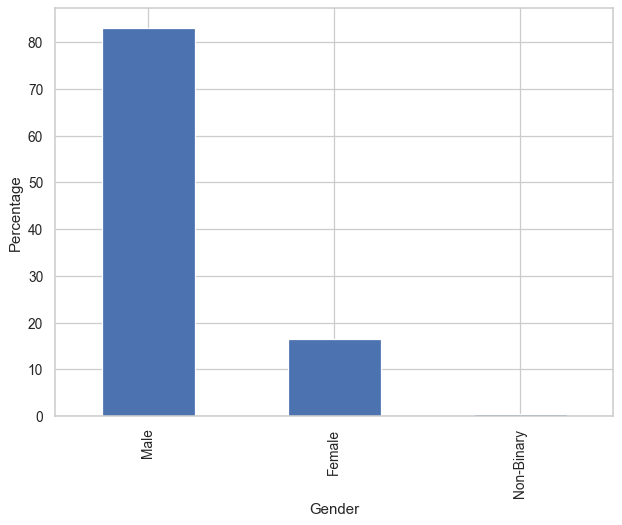

In [36]:
plot_count_bar_chart_of_series(df_hr['q3Gender'],xlabel='Gender',ylabel='Percentage',in_percentage=True)

***
## Heat Chart of Gender vs Plateform use to learn code

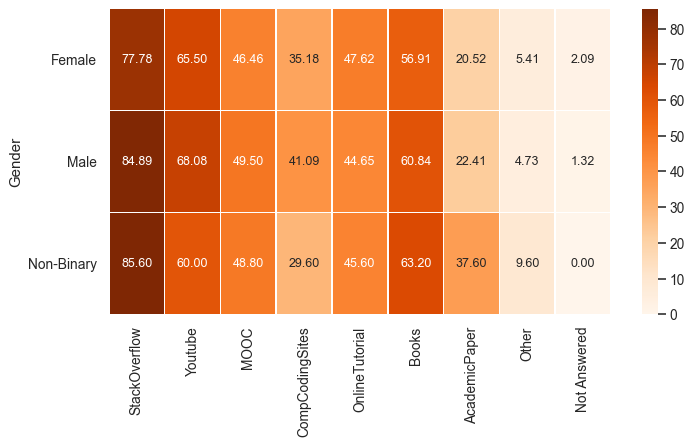

In [37]:
plt.figure(num=None, figsize=(9, 4.5), dpi=90)
sns.heatmap(pd.concat([df_hr['q3Gender'],df_code_learning_plateform],axis=1).groupby('q3Gender').mean()*100,
            fmt='.2f',
            annot=True,
            cmap='Oranges',
            linewidth=.5)

plt.ylabel('Gender')
plt.yticks(rotation=0) 
plt.show()

***
## Question
# 2. What Qualities Hiring managers look for in candidate

***
## Total number of Hiring Manager

In [38]:
df_hr['q16HiringManager'].value_counts().reset_index().rename(columns={'index':'Hiring Manager','q16HiringManager':'Count'})

,Hiring Manager,Count
0,No,17249
1,Yes,7841


***
## Percentage of people which are hiring manager

In [39]:
(df_hr['q16HiringManager'].value_counts()/df_hr['q16HiringManager'].count()).reset_index().rename(columns={'index':'Hiring Manager',
                                                                                                           'q16HiringManager':'percentage'})

,Hiring Manager,percentage
0,No,0.687485
1,Yes,0.312515


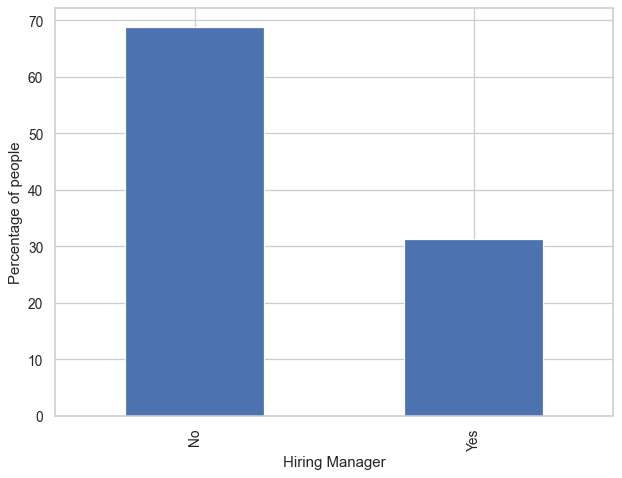

In [40]:
plot_count_bar_chart_of_series(df_hr['q16HiringManager'],xlabel='Hiring Manager',ylabel='Percentage of people',in_percentage=True)

***
## 2.1 What Qualification Hiring Managers look for 

In [41]:
# The following list contains column names of different qualification in the dataframe df_hr
cand_qual_list = ['q20CandYearExp','q20CandCompScienceDegree','q20CandCodingBootcamp','q20CandSkillCert',
                  'q20CandHackerRankActivity','q20CandOtherCodingCommAct',
                  'q20CandOpenSourceContrib','q20CandHackathonPart','q20CandPrevWorkExp','q20CandPrestigeDegree',
                  'q20CandLinkInSkills','q20CandGithubPersProj2','q20Other']

In [42]:
describe_column('q20CandGithubPersProj2')

Survey Question : 
    What are the top 3 most important qualifications you look for in an engineering candidate before the onsite? Check up to 3.
Note :
    shown if q16HiringManager == Yes


In [43]:
# Creating Sliced dataframe Copy of the data frame df_hr which contains names of column from cand_qual_list list
# and column q16HiringManager
df_cand_qual = df_hr[['q16HiringManager',*cand_qual_list]].copy()


# As names of the columns are some what confusing, so I have created 
# a dictionary to change the names
rename_map = {'q16HiringManager':'Hiring Manager',
              'q20CandYearExp':'Year Experience',
              'q20CandCompScienceDegree':'Comp Science Degree',
              'q20CandCodingBootcamp':'Coding bootcamp education',
              'q20CandSkillCert':'Skill Certifications',
              'q20CandHackerRankActivity':'Activity on HackerRank',
              'q20CandOtherCodingCommAct':'Other coding community activity',
              'q20CandOpenSourceContrib':'Open source contributions',
              'q20CandHackathonPart':'Hackathon participations',
              'q20CandPrevWorkExp':'Previous work experience',
              'q20CandPrestigeDegree':'Prestige of degree',
              'q20CandLinkInSkills':'LinkedIn skill endorsements',
              'q20CandGithubPersProj2':'Github or personal projects',
              'q20Other':'Other'
             }

# Renaming the column names based on the above dictionary
df_cand_qual.rename(columns=rename_map,inplace=True)

In [44]:
# Printing the count of each reply from the hiring manager
hm_qual_lst =df_cand_qual.groupby(['Hiring Manager']).count().T['Yes'].sort_values(ascending=False)
hm_qual_lst.reset_index().rename(columns={'index':'Qualification','Yes':'Count'})

,Qualification,Count
0,Previous work experience,6057
1,Year Experience,4685
2,Github or personal projects,4429
3,Comp Science Degree,2999
4,Open source contributions,2090
5,Other coding community activity,1547
6,Skill Certifications,1521
7,Activity on HackerRank,800
8,Hackathon participations,751
9,LinkedIn skill endorsements,647


***
### Percentage of hiring manager that look for different qualifications on engineering candidate

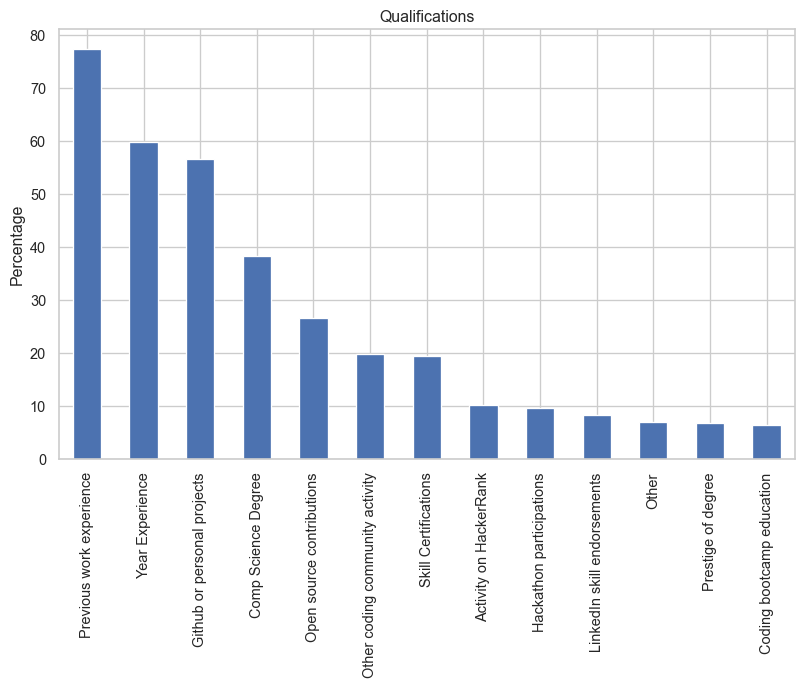

In [45]:
plt.figure(num=None, figsize=(10, 6), dpi=95)
no_of_hiring_manager = df_cand_qual['Hiring Manager'].value_counts()['Yes']
(hm_qual_lst*100/no_of_hiring_manager).plot(kind='bar')
plt.title('Qualifications')
plt.ylabel('Percentage')
plt.show()

In [46]:
(hm_qual_lst*100/no_of_hiring_manager)

Previous work experience           77.247800
Year Experience                    59.750032
Github or personal projects        56.485142
Comp Science Degree                38.247672
Open source contributions          26.654763
Other coding community activity    19.729626
Skill Certifications               19.398036
Activity on HackerRank             10.202780
Hackathon participations            9.577860
LinkedIn skill endorsements         8.251499
Other                               7.027165
Prestige of degree                  6.733835
Coding bootcamp education           6.491519
Name: Yes, dtype: float64

## 1.2 What Language Hiring manager wants you to know

In [47]:
# The following list contains the columns' name of language hiring manager want you to know
cand_lang_prof =['q22LangProfAgnostic','q22LangProfC','q22LangProfCPlusPlus','q22LangProfJava','q22LangProfPython',
                 'q22LangProfRuby','q22LangProfJavascript','q22LangProfCSharp','q22LangProfGo','q22LangProfScala',
                 'q22LangProfPerl','q22LangProfSwift','q22LangProfPascal','q22LangProfClojure','q22LangProfPHP',
                 'q22LangProfHaskell','q22LangProfLua','q22LangProfR','q22LangProfOther',]

In [48]:
describe_column('q22LangProfAgnostic')

Survey Question : 
    Which of these core competencies do you look for in software developer candidates? Check all that apply.
Note :
    shown if q16HiringManager == Yes


In [49]:
df_cand_lang_prof = df_hr[['q16HiringManager',*cand_lang_prof]].copy()
df_cand_lang_prof[df_cand_lang_prof['q16HiringManager']=='Yes'][cand_lang_prof].isnull().all(axis=1).value_counts()

False    7807
True       34
dtype: int64

In [50]:
# Creating Sliced dataframe Copy of the data frame df_hr which contains names of column from cand_qual_prof list
# and column q16HiringManager

df_cand_lang_prof = df_hr[['q16HiringManager',*cand_lang_prof]].copy()

# dictionary to map old name to new names of columns
rename_map = {'q16HiringManager':'Hiring Manager',
              'q22LangProfAgnostic':'Agnostic',
              'q22LangProfC':'C',
              'q22LangProfCPlusPlus':'CPlusPlus',
              'q22LangProfJava':'Java',
              'q22LangProfPython':'Python',
              'q22LangProfRuby':'Ruby',
              'q22LangProfJavascript':'Javascript',
              'q22LangProfCSharp':'CSharp',
              'q22LangProfGo':'Go',
              'q22LangProfScala':'Scala',
              'q22LangProfPerl':'Perl',
              'q22LangProfSwift':'Swift',
              'q22LangProfPascal':'Pascal',
              'q22LangProfClojure':'Clojure',
              'q22LangProfPHP':'PHP',
              'q22LangProfHaskell':'Haskell',
              'q22LangProfLua':'Lue',
              'q22LangProfR':'R',
              'q22LangProfOther':'Ohter'}


# renaming the columns of the dataframe df_cand_lang_prof according to above dictionary
df_cand_lang_prof.rename(columns=rename_map,inplace=True)

### Count of different languages hiring manager want you to know

In [51]:
hm_lang_lst = df_cand_lang_prof.groupby(['Hiring Manager']).count().T['Yes'].sort_values(ascending=False)
hm_lang_lst.reset_index().rename(columns={'index':'Language',0:'Count'})

,Language,Yes
0,Javascript,3760
1,Java,3651
2,Python,2572
3,Agnostic,1885
4,CPlusPlus,1676
5,C,1456
6,CSharp,1429
7,PHP,1134
8,Ruby,643
9,Ohter,569


## Preportion of hiring manager want you to know different language 

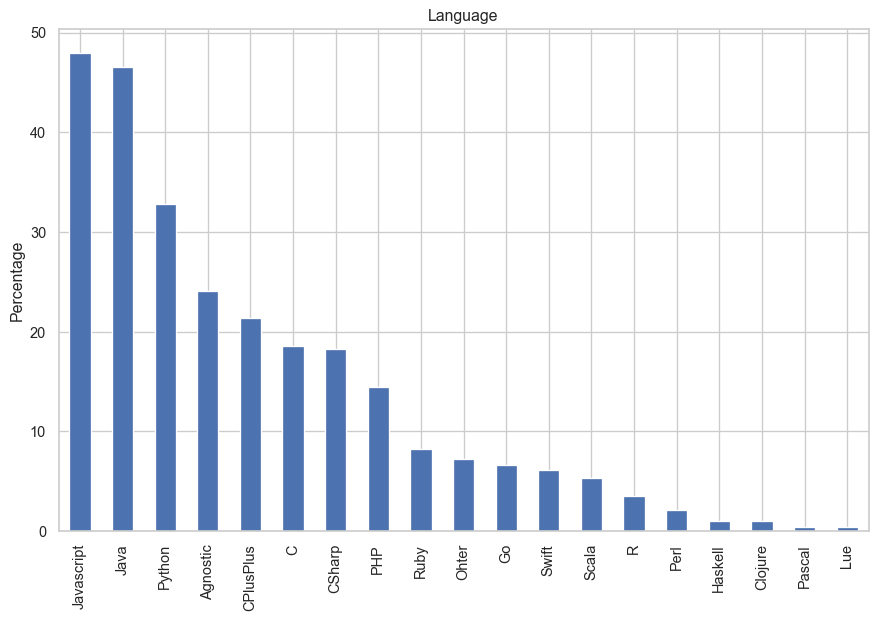

In [52]:
plt.figure(num=None, figsize=(11, 7), dpi=95)
no_of_hiring_manager = df_cand_qual['Hiring Manager'].value_counts()['Yes']
(hm_lang_lst*100/no_of_hiring_manager).plot(kind='bar')
plt.title('Language')
plt.ylabel('Percentage')
plt.show()

## 1.3 What FrameWorks Hiring manager wants you to know

In [53]:
# The following list contain the name of the column which represent name of the different frame work 
# Hiring manager whats you to know
cand_frame_prof = ['q23FrameAngularJS','q23FrameReact','q23FrameVueDotJS','q23FrameEmber','q23FrameBackboneDotJS',
                  'q23FrameSpring','q23FrameJSF','q23FrameStruts','q23FrameNodeDotJS','q23FrameExpressJS',
                  'q23FrameMeteor','q23FrameDjango','q23FramePyramid','q23FrameRubyonRails','q23FramePadrino',
                  'q23FrameASP','q23FrameNetCore','q23FrameCocoa','q23FrameReactNative','q23FrameRubyMotion',
                  'q23FrameOther']

In [54]:
describe_column('q23FrameAngularJS')

Survey Question : 
    Which frameworks do you look for?
Note :
    shown if q16HiringManager == Yes


In [55]:
# Creating a sliced dataframe copy from df_hr dataframe which contains the name of columns from cand_frame_prof list
# and column q16HiringManager
df_cand_frame_prof = df_hr[['q16HiringManager',*cand_frame_prof]].copy()


# As the names of the columns are some what confusing so I have created a dictionary to rename them
rename_map = {'q16HiringManager':'Hiring Manager',
              'q23FrameAngularJS':'AngularJS',
              'q23FrameReact':'React',
              'q23FrameVueDotJS':'VueDotJS',
              'q23FrameEmber':'Ember',
              'q23FrameBackboneDotJS':'BackboneDotJS',
              'q23FrameSpring':'Spring',
              'q23FrameJSF':'JSF',
              'q23FrameStruts':'Struts',
              'q23FrameNodeDotJS':'NodeDotJS',
              'q23FrameExpressJS':'ExpressJS',
              'q23FrameMeteor':'Meteor',
              'q23FrameDjango':'Django',
              'q23FramePyramid':'Pyramid',
              'q23FrameRubyonRails':'RubyonRails',
              'q23FramePadrino':'Padrino',
              'q23FrameASP':'ASP',
              'q23FrameNetCore':'NetCore',
              'q23FrameCocoa':'Cocoa',
              'q23FrameReactNative':'ReactNative',
              'q23FrameRubyMotion':'RubyMotion',
              'q23FrameOther':'Other'
             }

# Renaming the columns name of df_cand_frame_prof according to above map
df_cand_frame_prof.rename(columns=rename_map,inplace=True)

In [56]:
# Count of each responses
hm_frame_lst = df_cand_frame_prof.groupby(['Hiring Manager']).count().T['Yes'].sort_values(ascending=False)
hm_frame_lst.reset_index().rename(columns={'index':'Frame Work','Yes':'Count'})

,Frame Work,Count
0,AngularJS,2969
1,NodeDotJS,2852
2,React,2598
3,Spring,1782
4,NetCore,1121
5,Django,1084
6,Other,1080
7,ExpressJS,987
8,RubyonRails,796
9,ASP,779


## Percentage of different Frame working which hiring manager want candidate to know

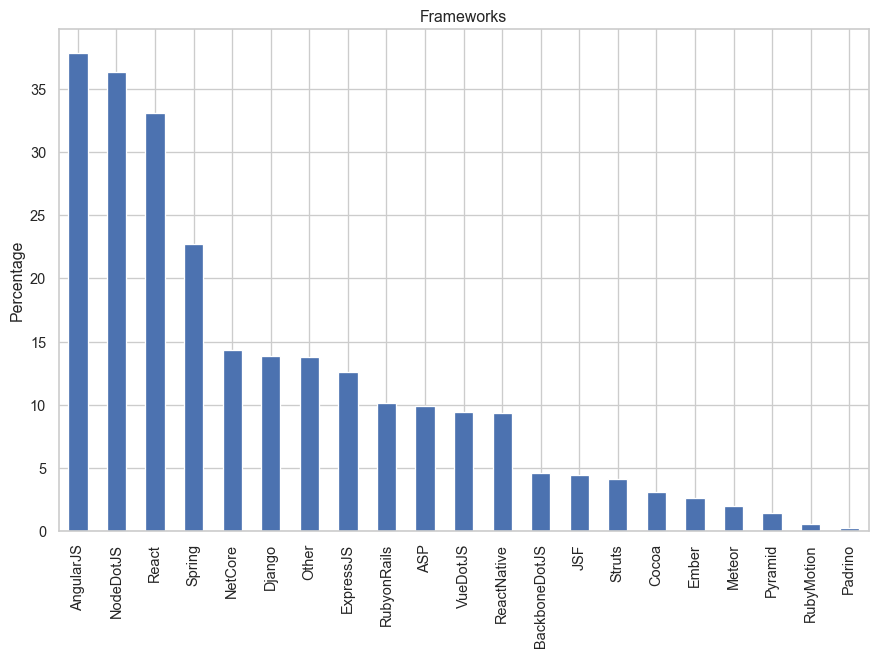

In [57]:
# Ploting the Percentage of different Frame working which hiring manager want candidate to know
plt.figure(num=None, figsize=(11, 7), dpi=95)
no_of_hiring_manager = df_cand_frame_prof['Hiring Manager'].value_counts()['Yes']
(hm_frame_lst*100/no_of_hiring_manager).plot(kind='bar')
plt.title('Frameworks')
plt.ylabel('Percentage')
plt.show()

## Question
# 3. What people look for in a company when looking for job opportunities ?


In [58]:
# The following list contain the name of the column which represent the things people
# look for while searching for job opportunities in any company
job_crit=['q12JobCritPrefTechStack','q12JobCritCompMission','q12JobCritCompCulture','q12JobCritWorkLifeBal',
          'q12JobCritCompensation','q12JobCritProximity','q12JobCritPerks','q12JobCritSmartPeopleTeam',
          'q12JobCritImpactwithProduct','q12JobCritInterestProblems','q12JobCritFundingandValuation',
          'q12JobCritStability','q12JobCritProfGrowth','q12JobCritOther',]


# Creating the copy of df_hr dataframe which contains the above columns
df_comp_job_opp = df_hr[job_crit].copy()

# As the names of the columns are some what confusing so I have created a dictionary 
# to rename them
rename_map = {'q12JobCritPrefTechStack':'Preferred tech stack',
              'q12JobCritCompMission':'Company Mission',
              'q12JobCritCompCulture':'Company Culture',
              'q12JobCritWorkLifeBal':'Work Life Balance',
              'q12JobCritCompensation':'Compensation',
              'q12JobCritProximity':'Proximity to where you live',
              'q12JobCritPerks':'Perks',
              'q12JobCritSmartPeopleTeam':'Smart People Team',
              'q12JobCritImpactwithProduct':'Impact with Product',
              'q12JobCritInterestProblems':'Interest Problems',
              'q12JobCritFundingandValuation':'Funding and Valuation',
              'q12JobCritStability':'Stability',
              'q12JobCritProfGrowth':'Professional growth and learning',
              'q12JobCritOther':'Other'}

# Renaming the columns according to above map
df_comp_job_opp.rename(columns=rename_map,inplace=True)

# Percentage of People 

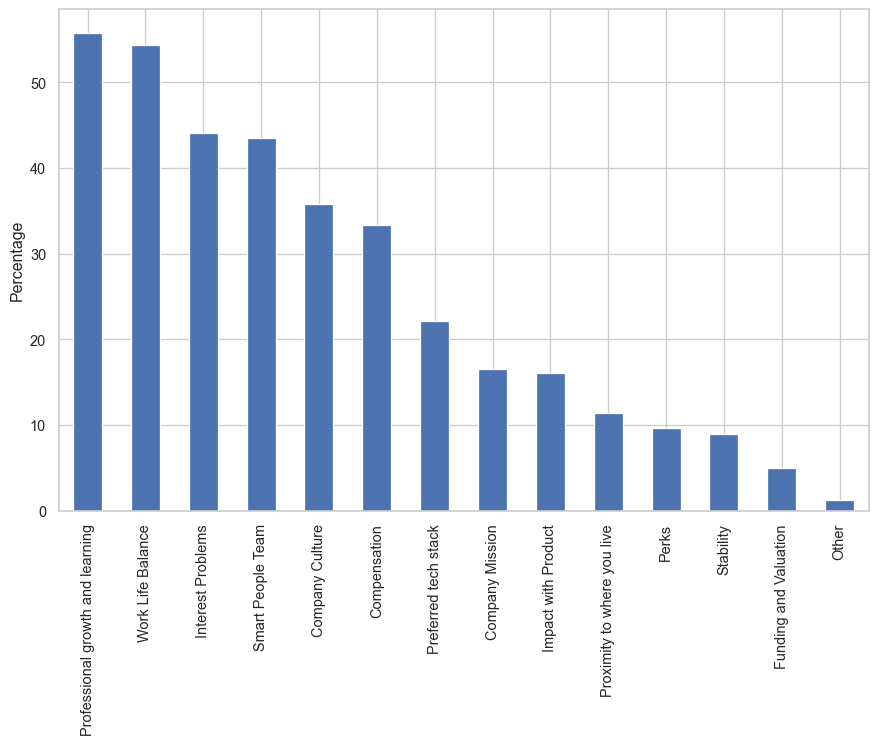

In [59]:
plt.figure(num=None, figsize=(11, 7), dpi=95)

(df_comp_job_opp.count().sort_values(ascending=False)*100/df_hr.shape[0]).plot(kind='bar')
plt.ylabel('Percentage')
plt.show()

In [60]:
(df_comp_job_opp.count().sort_values(ascending=False)*100/df_hr.shape[0])

Professional growth and learning    55.803109
Work Life Balance                   54.396174
Interest Problems                   44.037465
Smart People Team                   43.547230
Company Culture                     35.838980
Compensation                        33.363890
Preferred tech stack                22.116381
Company Mission                     16.592268
Impact with Product                 16.129932
Proximity to where you live         11.458749
Perks                                9.621363
Stability                            8.943802
Funding and Valuation                5.037864
Other                                1.271423
dtype: float64

## 3.1 What people within different age group look for when applying for job in a company

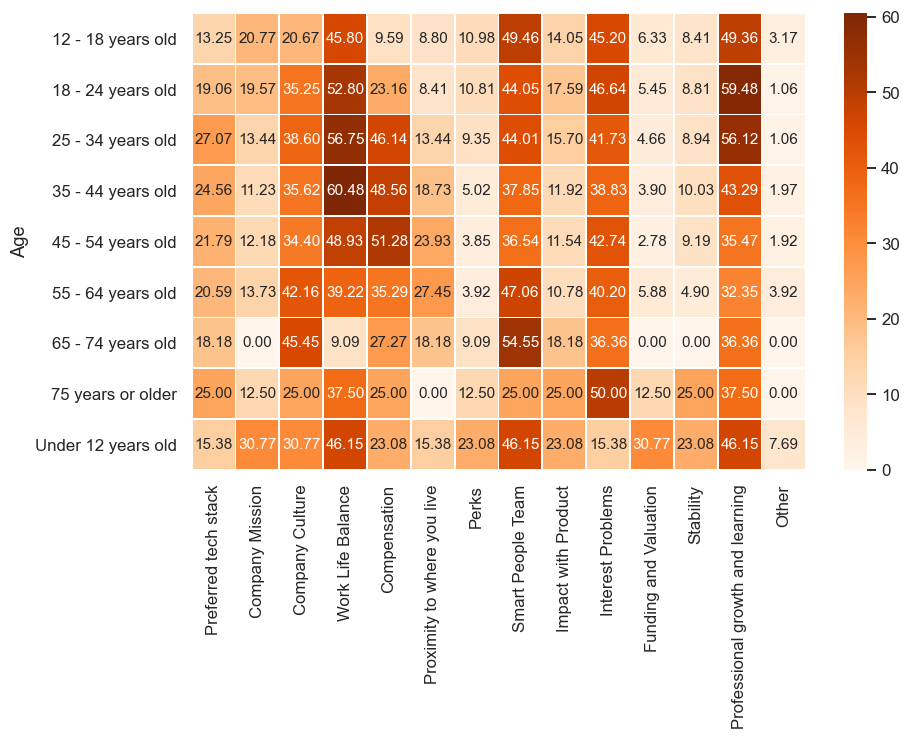

In [61]:
# As it is difficult to Handle caltgorical value 
# so here we have converted it to 1.0
# as there is only one value in each columns
df_comp_job_opp_clean = df_comp_job_opp.apply(lambda x : x.apply(lambda y: 1 if isinstance(y,str) else 0))



# Concating the cleaned DataFrame with The Age Column
concat_age_and_comp_job_opp = pd.concat([df_hr['q2Age'],df_comp_job_opp_clean],axis=1)


plt.figure(num=None, figsize=(9, 5.5), dpi=110)

#Grouping the concatenated dataframe based on Age column
group_by_column_age = concat_age_and_comp_job_opp.groupby('q2Age').mean()*100


# Ploting the HeatMap of group_by_column_age DataFrame
sns.heatmap(group_by_column_age,annot=True,fmt='.2f',cmap='Oranges',linewidths=.5)

plt.ylabel('Age')

plt.show()

## 3.2 Based on Gender 

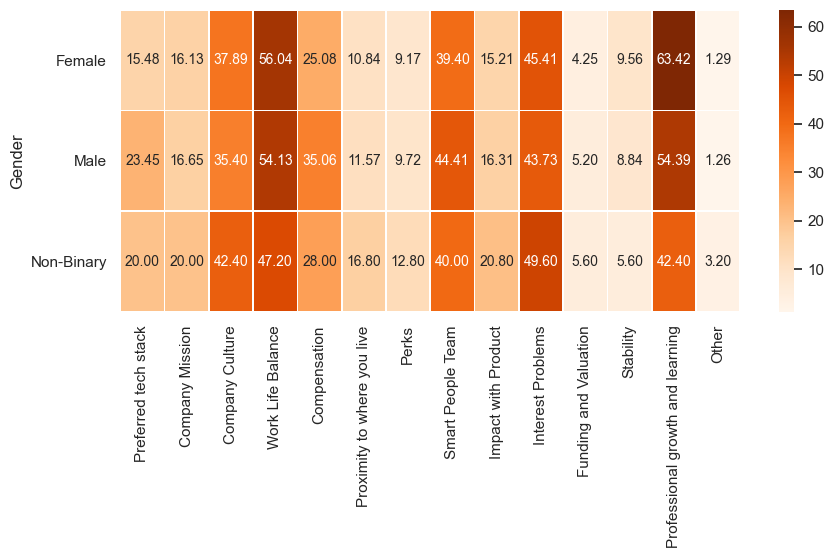

In [62]:
# Concating the cleaned DataFrame with The Gender Column
concat_gen_and_comp_job_opp = pd.concat([df_hr['q3Gender'],df_comp_job_opp_clean],axis=1)


plt.figure(num=None, figsize=(10, 4), dpi=100)

#Grouping the concatenated dataframe based on Gender column
group_by_column_gen = concat_gen_and_comp_job_opp.groupby('q3Gender').mean()*100


# Ploting the HeatMap of group_by_column_gen DataFrame
sns.heatmap(group_by_column_gen,annot=True,fmt='.2f',cmap='Oranges',linewidths=.5)

plt.ylabel('Gender')
plt.yticks(rotation=0) 
plt.show()

## 3.3 Based on different Country

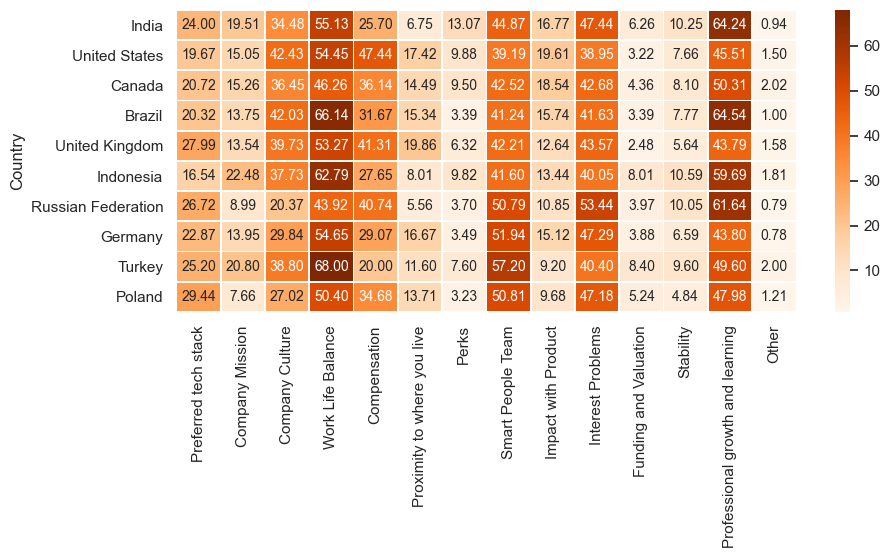

In [63]:
top_10_country = list(df_hr['CountryNumeric2'].value_counts().sort_values(ascending=False).head(10).index)

# Concating the cleaned DataFrame with The Gender Column
concat_coun_and_comp_job_opp = pd.concat([df_hr['CountryNumeric2'],df_comp_job_opp_clean],axis=1)


plt.figure(num=None, figsize=(10, 4), dpi=100)

#Grouping the concatenated dataframe based on Gender column
group_by_column_coun = concat_coun_and_comp_job_opp.groupby('CountryNumeric2').mean().loc[top_10_country]*100


# Ploting the HeatMap of group_by_column_gen DataFrame
sns.heatmap(group_by_column_coun,annot=True,fmt='.2f',cmap='Oranges',linewidths=.5)

plt.ylabel('Country')
plt.yticks(rotation=0) 
plt.show()



In [64]:
describe_column('q30LearnCodeStackOverflow')

Survey Question : 
    Besides HackerRank, which other resources do you use to practice and learn coding? Check all that apply.
